# Loan application status prediction

In this problem statement we need to build a machine learning model that can predict that whether the loan will be approved or not based on different inputs.

## Loading Dataset

In [1]:
# importing required libraries

import pandas as pd    # for data wrangling

import numpy as np   # to handle arrays

import matplotlib.pyplot as plt   # for plotting graphs

import seaborn as sns     # to plot graphs for analysis

import warnings    # to detect unnecessary warnings
warnings.filterwarnings('ignore')    # this will ignore unnecessary warnings

In [2]:
# loading dataframe
loan = pd.read_csv('loan_application_status.csv')

### Data analysis

In [3]:
# checking shape of data
loan.shape

(614, 13)

*There are 614 rows and 13 columns in the dataset.*

In [4]:
# loading top 10 rows of dataframe to take an overview of it
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#### Data types

In [5]:
# checking data types of columns
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

*Most columns contains object data type.*

#### Nan Values

In [6]:
# checking for nan values in data
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

*There are some columns which contains null values we will fill them accordingly.*

#### Unique values

In [7]:
# checking for unique values present in categorical column

# first we will make a list of all categorical columns
# we will use list concatenation for this
obj = [i for i in loan.columns if loan[i].dtypes == 'O']

In [8]:
# now we will check for unique values using for loop 
for i in obj:
    uni = loan[i].nunique()
    print('There are', uni, 'unique values present in', i, 'column')

There are 614 unique values present in Loan_ID column
There are 2 unique values present in Gender column
There are 2 unique values present in Married column
There are 4 unique values present in Dependents column
There are 2 unique values present in Education column
There are 2 unique values present in Self_Employed column
There are 3 unique values present in Property_Area column
There are 2 unique values present in Loan_Status column


*Here we can see the Loan_ID is unique for every row so we will drop that column.*

#### Statistical summary

In [9]:
# checking statistical summary of numerical data
static = loan.describe()
static

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations: 
      
       1: Few Columns have greater mean than median means data is skewed.

       2: There is huge difference between 75th percentile and maximum value in some columns so there is chances of 
       outliers.

In [10]:
# checking summary of object data
obj_summary = loan.describe(include=['O'])
obj_summary

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


*All columns contains 2 to 4 unique values except Loan_ID that is unique for every data.*

#### Skewness

In [11]:
# checking skewness present in numeric data
skew = loan.skew()
skew

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

*There is high skewness present in data we will analyse them through graph.*

#### Imbalance

In [12]:
# checking the distribution of categorical variable in target column
loan['Loan_Status'].value_counts(normalize = True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

*There is more than 60% data contains same type so we need to balance our dataset otherwise model may biased towards one.*

### Data Visualisation

#### Distribution of data

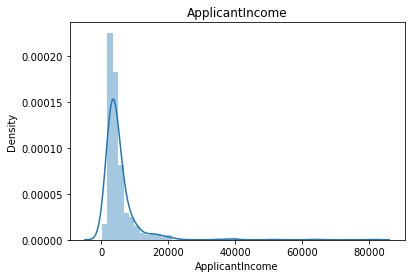

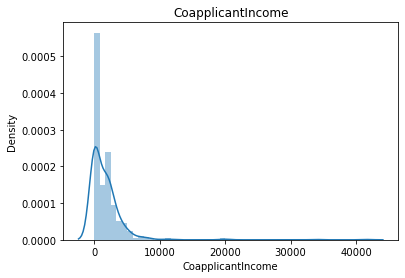

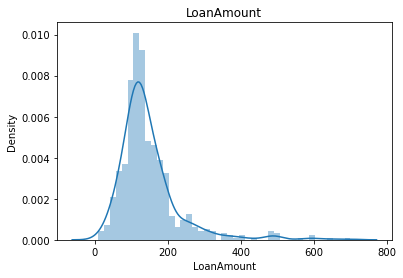

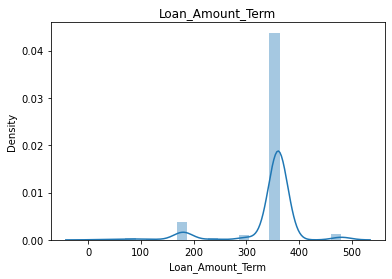

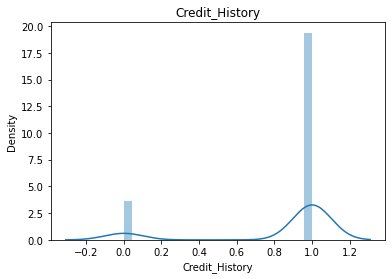

In [13]:
# checking distribution of numeric data
# we will make a list of numeric column using list concatenation
numeric = [i for i in loan.columns if loan[i].dtypes != 'O']

# using for loop to plot graph
# we will use distplot to check the distribution
for i in numeric:
    plt.title(i)
    sns.distplot(loan[i])
    plt.show()
    print('\n')

**Observation: Some columns have right skewed data and some have left skewed data.**

#### Categrical Features

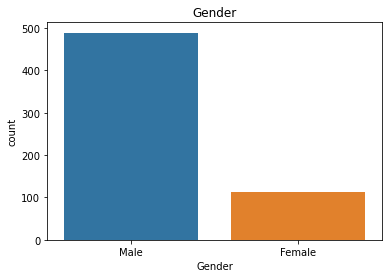

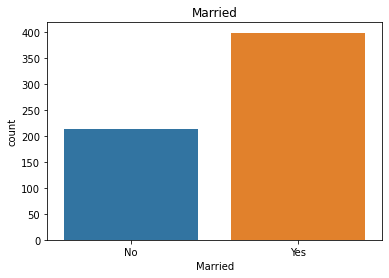

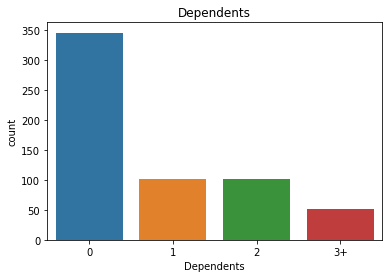

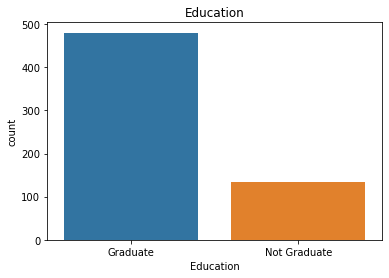

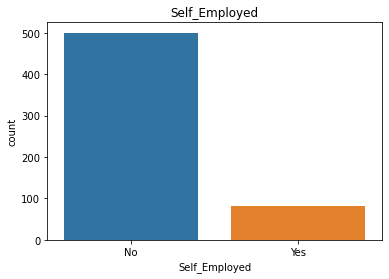

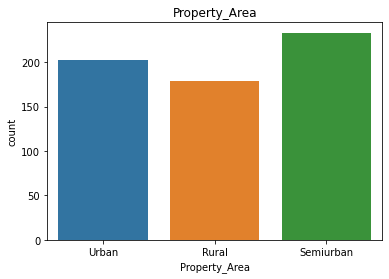

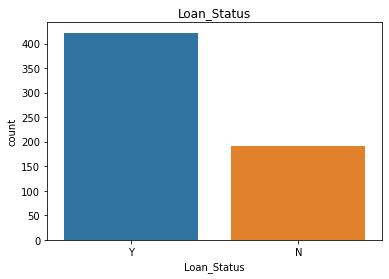

In [14]:
# we will use countplot to plot the graph of categorical columns

# using for loop to plot the graph
for i in obj[1:]:
    # we have used from 1 to all because index 0 contains Loan_ID which is unique for every data
    plt.title(i)
    sns.countplot(loan[i])
    plt.show()
    print('\n')

Observations:
    
    1: More Males applied for loan as compare to Female.
        
    2: Married applicants are more than unmarried.
        
    3: Most applicants for loan are graduate.
        
    4: Self employed are less to apply for loan.

#### Bivariate analysis

Relation between loan staus and ApplicantIncome


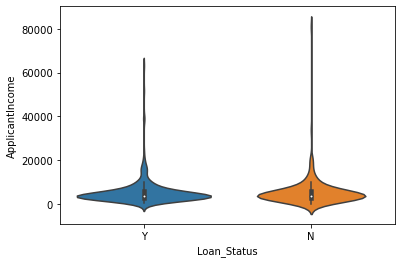



Relation between loan staus and CoapplicantIncome


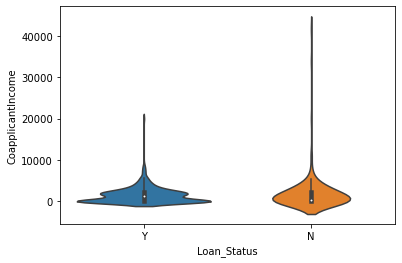



Relation between loan staus and LoanAmount


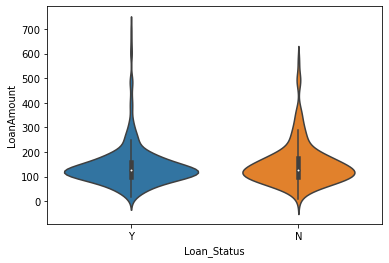



Relation between loan staus and Loan_Amount_Term


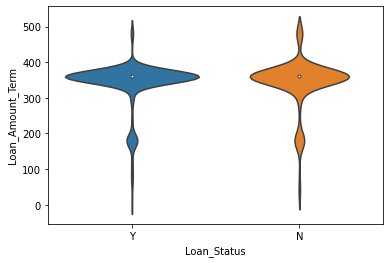



Relation between loan staus and Credit_History


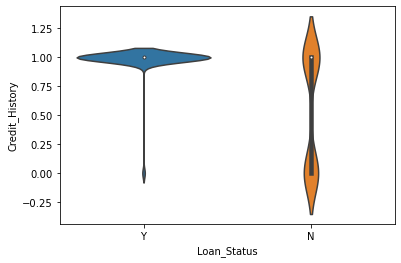

In [15]:
# checking relation between input numeric data with target column
# we will use for loop to plot graphs and use violinplot to find relationship
for i in numeric:
    print('Relation between loan staus and', i)
    plt.xlabel('Loan Status')
    plt.ylabel(i)
    sns.violinplot(loan['Loan_Status'], loan[i])
    plt.show()
    print('\n')

Observations:
    
    1: Most number of applicants income is nearby $1000 to $2000.
        
    2: Coapplicants income is also somewhere nearby like applicants income
        
    4: Most loans are applied for amount between $100 to $200.
        
    5: Most number of loan amount term is around 350.
        
    6: Most approved loan credit history is 1 but in case of not approved loan it is mix of 0 and 1.

#### Dropping Column

In [16]:
# first we will make a copy of the dataframe then perform tasks on that copy
df = loan.copy()

In [17]:
# dropping Loan_ID column
df.drop('Loan_ID', inplace = True, axis = 1)

#### Filling Nan Values

In [18]:
# we will fill null values of categorical features from their mode and numerical features from their mean values
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

#### Encoding

In [19]:
# We will use label encoder to encode the categorical features

# importing library for encoding
from sklearn.preprocessing import LabelEncoder

# making instance of encoder
le = LabelEncoder()

In [20]:
# we will use for loop to encode the dataset
for i in obj[1:]:
    df[i] = le.fit_transform(df[i])

In [21]:
# loading top 10 rows of dataset
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


**Here we can see the data is encoded.**

#### Correlation

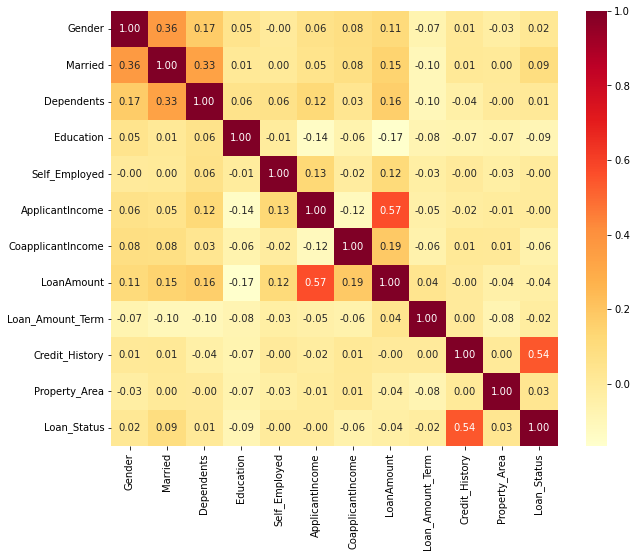

In [22]:
# Checking correlation between input and target variables
# we will use heatmap to plot check it
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'YlOrRd')
plt.show()

**Most columns showing positive correlation with target column.**

#### Outliers

In [23]:
# let's check for outliers in the dataset

# importing required libraries
from scipy.stats import zscore

In [24]:
# checking zscore values of data and holding it into a variable z
z = np.abs(zscore(df))

In [25]:
# checking data whose threshold value greater than 3 and holding them into a pandas dataframe
threshold = 3
outlier = pd.DataFrame(np.where(z>threshold))

In [26]:
# checking shape of data whose threshold value is greater than 3
outlier.shape[1]

41

*There are 41 rows which contains data that belongs outside the 3 standard deviation.*

In [27]:
# let's check the data loss if we remove them
data_loss = ((614-573)/614)*100
data_loss

6.677524429967427

*It is around 6 percent which can be accepted so we can remove those outliers*

In [28]:
# Removing the outliers and holding the data in a variable whose threshold value is less than 3
new_df = df[(z<3).all(axis = 1)]

*Outliers are now removed from the dataset.*

#### Over Sampling

As we have seen there is data imbalance in target column so we need to handle that.

We will use over sampling technique to handle that.

In [29]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [30]:
# first we will split input data and target data 
x = new_df.iloc[ : , :-1]
# holding only input data

y = new_df.iloc[ : , -1]
# holding only target data

In [31]:
# importing required library
from imblearn.over_sampling import SMOTE

# making instance of it
smt = SMOTE()

In [32]:
# checking shape of input and target data
print('Input data shape', x.shape)
print('Target data shape', y.shape)

Input data shape (577, 11)
Target data shape (577,)


In [33]:
# now passing input and target data to balance the dataset
x1, y1 = smt.fit_resample(x,y)

In [34]:
# checking shape of input and target data after doing oversampling
print('Input data shape', x1.shape)
print('Target data shape', y1.shape)

Input data shape (796, 11)
Target data shape (796,)


In [35]:
# checking the values of all different categorical features of target data
y1.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

*As both categories are now same so now our dataset is balanced*

#### Skewness

As we have seen there is skewness present in our data so we will handle that.

In [36]:
# checking skewness of input data and sorting it into descending order
x1.skew().sort_values(ascending = False)

Self_Employed        2.709506
ApplicantIncome      2.194473
Education            1.575506
CoapplicantIncome    1.349184
Dependents           1.222818
LoanAmount           1.130221
Property_Area        0.134850
Married             -0.321231
Credit_History      -1.238250
Gender              -1.382297
Loan_Amount_Term    -1.999061
dtype: float64

In [37]:
# importing library to handle the distribution of data
from sklearn.preprocessing import PowerTransformer

In [38]:
# making an instance of it
pt = PowerTransformer()

In [39]:
# passing input data to transform
new_x = pt.fit_transform(x1)
# this will provide output in numpy array format

# holding the output in pandas dataframe
inp_x = pd.DataFrame(new_x, columns = x1.columns)

In [40]:
# checking skewness of data
inp_x.skew()

Gender              -1.382297
Married             -0.321231
Dependents           0.592928
Education            1.575506
Self_Employed        2.709506
ApplicantIncome      0.007326
CoapplicantIncome   -0.135395
LoanAmount           0.042968
Loan_Amount_Term     0.664273
Credit_History      -1.084837
Property_Area       -0.088118
dtype: float64

*Here we can see the skewness is handled now properly.*

#### Scaling the data

In [41]:
# importing require library
from sklearn.preprocessing import StandardScaler

# holding it into an instance
ssc = StandardScaler()

In [42]:
# applying scaling to input data
scaled = ssc.fit_transform(inp_x)

# this will give output in numpy array format 

# making pandas dataframe of output
input_x = pd.DataFrame(scaled, columns = inp_x.columns)

**Now our data is ready to go for model training.**

### Model building

In [97]:
# importing classification algorithms and validation matrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
# making instance of every model
lr = LogisticRegression()
sv = SVC()
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()
gn = GaussianNB()

#### Random State

Now we will find the best random state to split our data and we will use LogisticRegression model for this.

In [45]:
# first we will find the best random state to split our data

max_acc = 0
# making a variable max_acc and initialising it with 0 we will store the maximum accuracy in it
rs = 0
# making a variable rs and initialising it with 0 we will store the random state in it for which maximum accuracy is 
# achieved

# using a for loop to split data into 100 different random states
for i in range(1,101):
    X_train, X_test, Y_train, Y_test = train_test_split(input_x, y1, test_size = 0.25, random_state = i )
    # taking 25% data for testing
    
    # using DecisionTreeClassifier
    lr.fit(X_train, Y_train)
    
    # making prediction on test data
    pred = lr.predict(X_test)
    
    # checking accuracy
    accuracy = accuracy_score(pred, Y_test)
    
    print('At random state', i, 'accuracy score is', accuracy)
    
    
    # using if condition to store the best accuracy and random state
    if accuracy>max_acc:
        max_acc = accuracy
        best_rs = i
        print('Maximum accuracy is', max_acc,'and best random state is', best_rs)

At random state 1 accuracy score is 0.7487437185929648
Maximum accuracy is 0.7487437185929648 and best random state is 1
At random state 2 accuracy score is 0.7286432160804021
At random state 3 accuracy score is 0.7587939698492462
Maximum accuracy is 0.7587939698492462 and best random state is 3
At random state 4 accuracy score is 0.7788944723618091
Maximum accuracy is 0.7788944723618091 and best random state is 4
At random state 5 accuracy score is 0.7989949748743719
Maximum accuracy is 0.7989949748743719 and best random state is 5
At random state 6 accuracy score is 0.7839195979899497
At random state 7 accuracy score is 0.7788944723618091
At random state 8 accuracy score is 0.7688442211055276
At random state 9 accuracy score is 0.7688442211055276
At random state 10 accuracy score is 0.7889447236180904
At random state 11 accuracy score is 0.7336683417085427
At random state 12 accuracy score is 0.8140703517587939
Maximum accuracy is 0.8140703517587939 and best random state is 12
At ran

**From here we can observe the maximum accuracy is 84 at random state 68**

#### Data Splitting

We will split our data at random state 68.

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(input_x, y1, test_size = 0.20, random_state = 68)
# taking 20% data for testing

In [47]:
# checking testing and training data shape
print('Input training data shape:', X_train.shape)
print('Target training data shape:', Y_train.shape)
print('Input test data shape:', X_test.shape)
print('Target test data shape:', Y_test.shape)

Input training data shape: (636, 11)
Target training data shape: (636,)
Input test data shape: (160, 11)
Target test data shape: (160,)


#### Selecting a model

In [49]:
# Now we will train different classification models and check the accuracy score of all models then select the best model

# making a list of all models
model = [lr, sv, dt, kn, rf, gn]

# using for loop to train all models

for model in model:
    model.fit(X_train, Y_train)
    
    # making predictions
    pred = model.predict(X_test)
    
    # checking accuracy score
    accuracy = accuracy_score(pred, Y_test)
    
    # confusion matrix
    cnf_matrix = confusion_matrix(pred, Y_test)
    
    # classification report
    clf_report = classification_report(pred, Y_test)
    
    print('Evaluation of model', model,':')
    print('Accuracy score:', accuracy)
    print('Confusion matrix:\n', cnf_matrix)
    print('Classification report\n', clf_report)
    print('\n\n')

Evaluation of model LogisticRegression() :
Accuracy score: 0.8625
Confusion matrix:
 [[48  5]
 [17 90]]
Classification report
               precision    recall  f1-score   support

           0       0.74      0.91      0.81        53
           1       0.95      0.84      0.89       107

    accuracy                           0.86       160
   macro avg       0.84      0.87      0.85       160
weighted avg       0.88      0.86      0.87       160




Evaluation of model SVC() :
Accuracy score: 0.825
Confusion matrix:
 [[47 10]
 [18 85]]
Classification report
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        57
           1       0.89      0.83      0.86       103

    accuracy                           0.82       160
   macro avg       0.81      0.82      0.81       160
weighted avg       0.83      0.82      0.83       160




Evaluation of model DecisionTreeClassifier() :
Accuracy score: 0.76875
Confusion matrix:
 [[51 23]
 [1

**From here we can see RandomForestClassifier is giving highest accuracy score so we will select that model.**

#### Final model training

In [64]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [65]:
# making predictions on test data
pred = rf.predict(X_test)

In [66]:
# checking accuracy score
print('Accuracy score:', accuracy_score(pred, Y_test))

Accuracy score: 0.89375


**Model Accuracy is 89%.**

In [68]:
# checking confusion matrix
print('Confusion matrix:\n', confusion_matrix(pred, Y_test))

Confusion matrix:
 [[54  6]
 [11 89]]


**There are certain values in false positive rate and true positive rate because model is not 100% accurate.**

In [70]:
# checking cassification report
print('Classification report:\n', classification_report(pred, Y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        60
           1       0.94      0.89      0.91       100

    accuracy                           0.89       160
   macro avg       0.88      0.90      0.89       160
weighted avg       0.90      0.89      0.89       160



**Average accuracy of model is around 89%.**

### Model Evaluation

#### Cross Validation

In [71]:
# importing required model
from sklearn.model_selection import cross_val_score

In [72]:
# using for loop to split data at different cross folds
for i in range(2,15):
    score = cross_val_score(rf, input_x, y1, cv = i )
    mean_score = score.mean()
    print('At cross fold', i,'mean score is', mean_score)

At cross fold 2 mean score is 0.7826633165829145
At cross fold 3 mean score is 0.8053624627606754
At cross fold 4 mean score is 0.8190954773869348
At cross fold 5 mean score is 0.8229716981132077
At cross fold 6 mean score is 0.8267638793954583
At cross fold 7 mean score is 0.8205469425776831
At cross fold 8 mean score is 0.8382323232323232
At cross fold 9 mean score is 0.8319997730110089
At cross fold 10 mean score is 0.8281645569620254
At cross fold 11 mean score is 0.827037498270375
At cross fold 12 mean score is 0.8282451379466305
At cross fold 13 mean score is 0.8307977057316029
At cross fold 14 mean score is 0.8343403150733977


**There is not much difference in model accuracy and cross validation score it is between 0.06 to 0.11 so we can say that the data is neither underfitting nor overfitting.**

#### Hyperparameter Tuning

Let's do hyperparameter tuning of model maybe some accuracy will improve.

In [73]:
# importing required library
from sklearn.model_selection import GridSearchCV

In [74]:
# making a dictionary of parameters
params = {'n_estimators':[100,200,300,400,500], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2']}

# making instance for tuning and passing model and parameters
gsv = GridSearchCV(rf, params)

In [75]:
# passing data for training
gsv.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [76]:
# finding best parameter and that accuracy
print('Best Parameter:', gsv.best_params_)
print('Best score:', gsv.best_score_)

Best Parameter: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 200}
Best score: 0.8096948818897637


**Here we can see at best parameters model is giving less accuracy than default training.**

#### AUC_ROC Curve

In [77]:
# importing required libraries for it
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [79]:
# using predict_proba function for model RandomForestClassifier to predict the occurance of 1
y_pred_prob = rf.predict_proba(X_test)[:,1]

In [80]:
# using these predicted probability to find fpr (false positive rate), tpr (True Positive rate) and threshold values

fpr, tpr, threshold = roc_curve(Y_test, y_pred_prob)

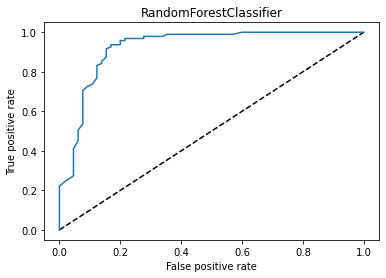

In [81]:
# making auc_roc curve
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.title('RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [82]:
# checking roc_score
score = roc_auc_score(Y_test, rf.predict(X_test))
score

0.8838056680161943

**The Graph is not straight because we can see the accuracy score of model is 88%**

### Saving the best model

In [87]:
# importing required library
import pickle

In [88]:
# making a file to save model into it
filename = 'lnp.obj'

In [89]:
# dumping the best model into the file by opening the file in write binary mode
pickle.dump(rf, open(filename, 'wb'))

### Loading the model

In [90]:
# loading the file in read binary model in which model is saved
loan = pickle.load(open('lnp.obj', 'rb'))

In [92]:
# making predictions on test_data
pred = loan.predict(X_test)

In [98]:
# checking accuracy score
print('Accuracy score:', accuracy_score(pred, Y_test))

Accuracy score: 0.89375


*Accuracy of model is 89%.*

In [99]:
# making dataframe of predictions
pd.DataFrame([loan.predict(X_test)[:], Y_test[:]],index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predicted,0,1,1,1,0,1,1,0,1,1,...,0,0,0,1,1,0,1,1,1,0
Original,0,1,1,1,0,1,1,0,1,1,...,0,0,0,1,1,0,1,1,1,0


**From here we can see that the model is making quite good predictions.**